<a href="https://colab.research.google.com/github/Neelesh-Jaiswal/Practicing/blob/master/CNN_cats_and_dogs_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import files
files.upload()
os.system("mkdir -p ~/.kaggle")
os.system("cp kaggle.json ~/.kaggle/")
os.system("chmod 600 ~/.kaggle/kaggle.json")

Saving kaggle.json to kaggle.json


0

In [ ]:
#To check if the GPU is activated or not
import tensorflow as tf
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

GPU is available


In [ ]:
#This is to check if my GPU is shared with other users and how much of GPU is getting utilized by other users

# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

Gen RAM Free: 11.4 GB  | Proc size: 2.4 GB
GPU RAM Free: 11503MB | Used: 4777MB | Util  29% | Total 16280MB


In [ ]:
#!kill -9 -1 
#Killing the process by the kernel
#since my GPU was getting shared with other users hence I ran this shell command to ensure the GPU utilization is 0%.
#We want zero utilization (Util   0%)

In [ ]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 32.5MB/s]
 98% 265M/271M [00:04<00:00, 97.2MB/s]
100% 271M/271M [00:04<00:00, 69.0MB/s]
 97% 528M/543M [00:05<00:00, 184MB/s]
100% 543M/543M [00:06<00:00, 94.3MB/s]


In [ ]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      

In [ ]:
!unzip test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           
  inflating: test1/5520.jpg          

In [ ]:
import matplotlib.pyplot as plt
import cv2

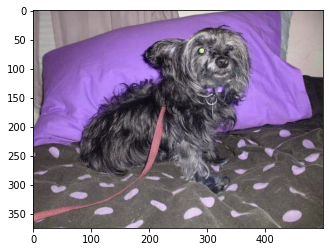

In [ ]:
#showing the image
dog_img = cv2.imread('./train/dog.0.jpg')
plt.imshow(dog_img)

In [ ]:
dog_img.shape #shape of the array of the above image

(375, 499, 3)

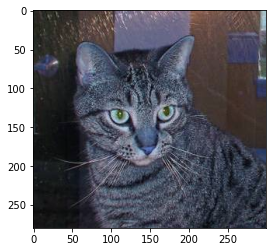

In [ ]:
cat_img = cv2.imread('./train/cat.1.jpg')
plt.imshow(cat_img)

In [ ]:
cat_img.shape

(280, 300, 3)

In [ ]:
import pandas as pd
import os
pd.options.display.max_rows = None

In [ ]:
filenames = os.listdir('./train')
filenames

['dog.3566.jpg',
 'cat.8447.jpg',
 'dog.11854.jpg',
 'dog.6841.jpg',
 'dog.11179.jpg',
 'dog.6313.jpg',
 'dog.3885.jpg',
 'cat.1088.jpg',
 'dog.6124.jpg',
 'cat.11226.jpg',
 'dog.11136.jpg',
 'cat.1626.jpg',
 'dog.7275.jpg',
 'dog.6624.jpg',
 'cat.7823.jpg',
 'dog.6207.jpg',
 'cat.3842.jpg',
 'dog.8824.jpg',
 'cat.7931.jpg',
 'dog.1222.jpg',
 'cat.2126.jpg',
 'cat.4562.jpg',
 'dog.4110.jpg',
 'cat.10026.jpg',
 'cat.5143.jpg',
 'dog.742.jpg',
 'cat.8641.jpg',
 'cat.6797.jpg',
 'cat.4232.jpg',
 'dog.5612.jpg',
 'cat.8413.jpg',
 'dog.5772.jpg',
 'dog.10470.jpg',
 'dog.8328.jpg',
 'cat.6579.jpg',
 'dog.8969.jpg',
 'dog.6227.jpg',
 'dog.3594.jpg',
 'cat.8209.jpg',
 'dog.17.jpg',
 'dog.10510.jpg',
 'dog.5816.jpg',
 'dog.8301.jpg',
 'cat.11863.jpg',
 'cat.4978.jpg',
 'dog.303.jpg',
 'cat.8250.jpg',
 'dog.4419.jpg',
 'dog.9980.jpg',
 'dog.2932.jpg',
 'dog.1768.jpg',
 'cat.3432.jpg',
 'cat.6473.jpg',
 'dog.11166.jpg',
 'cat.4667.jpg',
 'cat.11843.jpg',
 'dog.10309.jpg',
 'cat.10027.jpg',
 'dog.

In [ ]:
filenames[0].split('.')

['dog', '3566', 'jpg']

In [ ]:
filenames[0].split('.')[0]

'dog'

In [ ]:
#creating a catergories column to distinguish each filename in the train dataset
catergories = []
for i in filenames:
    a = i.split('.')[0]
    if a == 'dog':
        catergories.append('dog')
    else:
        catergories.append('cat')
catergories

['dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',


In [ ]:
#creating the dataframe to store the trained data
df = pd.DataFrame(
    {
        'Filenames':filenames,
        'Catergory':catergories
    }
)
df.head()

,Filenames,Catergory
0,dog.3566.jpg,dog
1,cat.8447.jpg,cat
2,dog.11854.jpg,dog
3,dog.6841.jpg,dog
4,dog.11179.jpg,dog


In [ ]:
df.tail()

,Filenames,Catergory
24995,cat.3067.jpg,cat
24996,dog.8948.jpg,dog
24997,cat.10172.jpg,cat
24998,cat.10586.jpg,cat
24999,cat.4502.jpg,cat


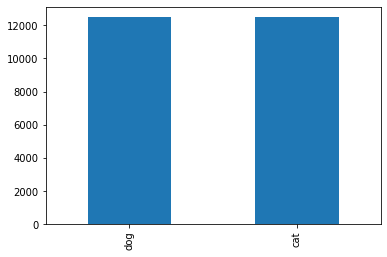

In [ ]:
#checking unbalancing
df['Catergory'].value_counts().plot.bar()

In [ ]:
#splitting the training df into train and test data
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(df,test_size = 0.2)
train_df.shape,test_df.shape

((20000, 2), (5000, 2))

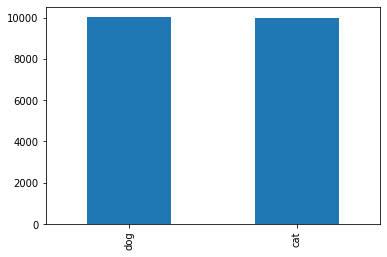

In [ ]:
#checking unbalancing after split in training data
train_df['Catergory'].value_counts().plot.bar()

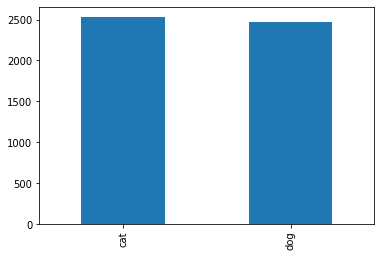

In [ ]:
#checking unbalancing after split in training data
test_df['Catergory'].value_counts().plot.bar()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator,load_img

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255) #transform every pixel value from range [0,255] -> [0,1] so that it treats  
                                               #all images in the same manner
datagen

In [ ]:
traingenerator = datagen.flow_from_dataframe(train_df,directory = './train',
                                            x_col = 'Filenames',y_col = 'Catergory',
                                            target_size = (224,224),class_mode = 'categorical',
                                            batch_size = 32)

Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
traingenerator

In [ ]:
testgenerator = datagen.flow_from_dataframe(test_df,directory = './train',
                                         x_col = 'Filenames',y_col = 'Catergory',#df columns names for X and y
                                         target_size = (224,224), class_mode = 'categorical',
                                         batch_size = 32)

Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
#@title Checking how the ImageDataGenerator works


In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = datagen.flow_from_dataframe(
    example_df, 
    "/content/train", 
    x_col='Filenames',
    y_col='Catergory',
    target_size=(224,224),
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


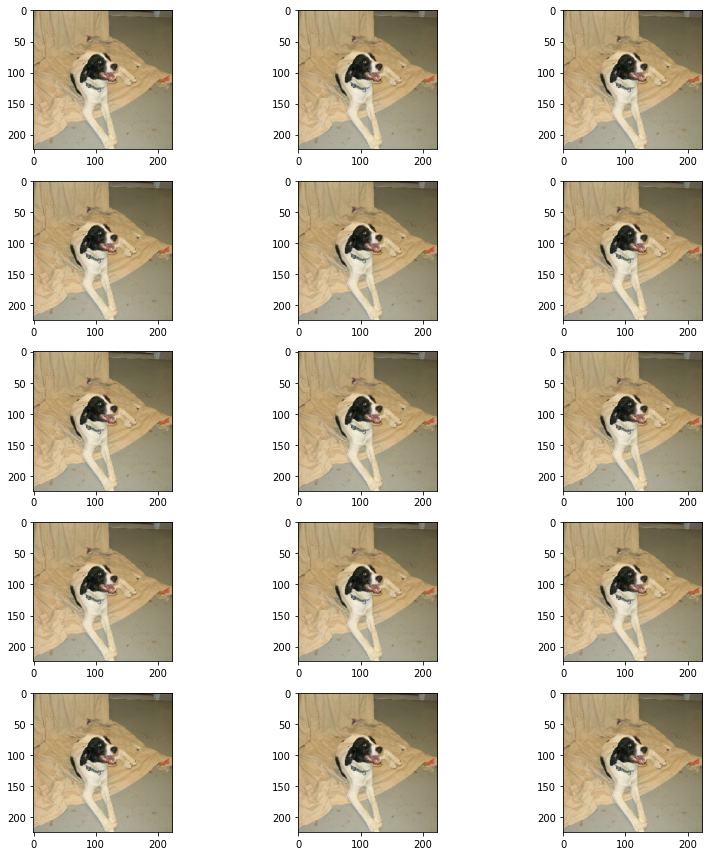

In [ ]:
#Checking how the augmentation is going on. We used only one parameter i.e. rescale. So there will be no change in the images below
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [ ]:
model = Sequential()

model.add(Conv2D(32,(5,5),activation = 'relu',input_shape = (224,224,3)))
# 32 is the number of o/p channels we need to feed and (5,5) is the filter size
model.add(MaxPooling2D(pool_size = (2,2)))
print(model.output_shape)

model.add(Conv2D(64,(5,5),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
print(model.output_shape)

model.add(Conv2D(128,(5,5),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
print(model.output_shape)

model.add(Conv2D(256,(5,5),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
print(model.output_shape)

model.add(Conv2D(256,(5,5),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
print(model.output_shape)

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())#   mean of 0 and std dev. of 1
model.add(Dropout(0.5))
model.add(Dense(2,activation = 'softmax'))#   2 because we have two classes(cat and dog)

#compiling the model
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

(None, 110, 110, 32)
(None, 53, 53, 64)
(None, 24, 24, 128)
(None, 10, 10, 256)
(None, 3, 3, 256)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 256)       8

In [ ]:
model.output_shape

(None, 2)

In [ ]:
model_history = model.fit_generator(
                    traingenerator,
                    epochs = 20,
                    validation_data = testgenerator,
                    validation_steps = len(testgenerator),
                    steps_per_epoch = len(traingenerator),
                    verbose = 2
                    )
#it took 26 minutes on GPU. You can also see the execution time for each epoch below

Epoch 1/20
625/625 - 80s - loss: 0.2790 - accuracy: 0.8812 - val_loss: 0.3014 - val_accuracy: 0.8716
Epoch 2/20
625/625 - 80s - loss: 0.2316 - accuracy: 0.9048 - val_loss: 0.2312 - val_accuracy: 0.9046
Epoch 3/20
625/625 - 79s - loss: 0.1920 - accuracy: 0.9215 - val_loss: 0.2543 - val_accuracy: 0.8962
Epoch 4/20
625/625 - 79s - loss: 0.1566 - accuracy: 0.9386 - val_loss: 0.2999 - val_accuracy: 0.8894
Epoch 5/20
625/625 - 80s - loss: 0.1301 - accuracy: 0.9498 - val_loss: 0.5859 - val_accuracy: 0.8530
Epoch 6/20
625/625 - 79s - loss: 0.1095 - accuracy: 0.9571 - val_loss: 0.3501 - val_accuracy: 0.8794
Epoch 7/20
625/625 - 79s - loss: 0.0832 - accuracy: 0.9677 - val_loss: 0.3425 - val_accuracy: 0.8858
Epoch 8/20
625/625 - 79s - loss: 0.0756 - accuracy: 0.9724 - val_loss: 0.7920 - val_accuracy: 0.8374
Epoch 9/20
625/625 - 81s - loss: 0.0642 - accuracy: 0.9758 - val_loss: 0.4602 - val_accuracy: 0.8620
Epoch 10/20
625/625 - 81s - loss: 0.0681 - accuracy: 0.9748 - val_loss: 0.2869 - val_accura

In [ ]:
#Saving the model
model.save_weights("model.h5")

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

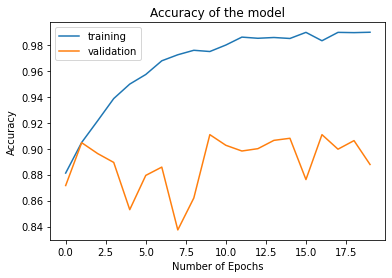

In [ ]:
#plotting train v/s validation accuracy graph
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['training','validation'],loc='upper left')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of the model')
plt.show()

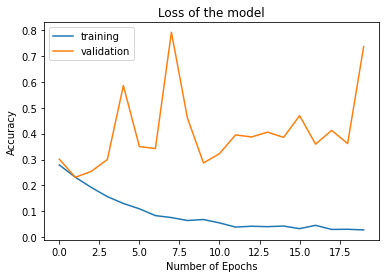

In [ ]:
#plotting train v/s validation loss graph
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.legend(['training','validation'],loc='upper left')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Loss of the model')
plt.show()

In [ ]:
traingenerator.class_indices #labelling done by keras

{'cat': 0, 'dog': 1}

In [ ]:
#checking the key-value pair
labels = traingenerator.class_indices
labels

{'cat': 0, 'dog': 1}

In [ ]:
#reversing the key-value pair
labels = dict(
    (v,k) for k,v in labels.items()
)
labels

{0: 'cat', 1: 'dog'}

# Prediction - one image

In [ ]:
import numpy as np

def img_show(image):
  b,g,r = cv2.split(image)
  image = cv2.merge((r,g,b))
  plt.imshow(image)
  plt.show()
  return image

def test(model,image_path):
  img = cv2.imread(image_path)
  img = img_show(img)
  img = cv2.resize(img,(224,224))
  img = np.reshape(img,(1,224,224,3))
  img = img/255.0
  prediction = model.predict(img)
  prediction = np.argmax(prediction)
  labels = (traingenerator.class_indices)
  labels = dict((v,k) for k,v in labels.items())
  return labels[prediction]

In [ ]:
def test(model,image_path):
  
  img = cv2.imread(image_path)
  img = img_show(img)
  img = cv2.resize(img,(224,224))
  img = np.reshape(img,(1,224,224,3))
  img = img/255.0
  prediction = model.predict(img)
  prediction = np.argmax(prediction)
  labels = (traingenerator.class_indices)
  labels = dict((v,k) for k,v in labels.items())
  return labels[prediction]

### **Explanation**
In **img_show()**, I have just changed the image from BGR to RGB. 
Opencv reads the image in BGR format and matplotlib takes the image in RGB format so to show image we first need to convert it into RGB format. 
Now we will resize the image to the shape we used at the time of training. Now we can predict on a custom image using model.predict function. 
But we need to feed a batch of the image in this function rather than just a single image. 
So we reshape our image from 224,224,3 to 1,224,224,3 which means that batch size is 1. 
We also need to normalize the image thats why we divided image with 255.0. 
Now prediction **will return the softmax output**. As we know, softmax will return confidence score and the sum of predictions will be 1.
np.argmax will return the index of maximum prediction. 
Now we need to convert it back to the string label from the encoded label of this. 
Keras comes to save us here again. Keras internally creates a dictionary to convert labels from string to integer label. 
We can visualize this dictionary using class_indices function.

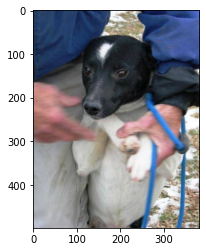

predicted label is: dog


In [ ]:
print('predicted label is:' , test(model,'/content/test1/1.jpg'))

# Prediction- Complete folder

In [ ]:
test_filenames = os.listdir('/content/test1')
test_filenames[0:5]#just checking some values

['5360.jpg', '3937.jpg', '10438.jpg', '5067.jpg', '7013.jpg']

In [ ]:
len(test_filenames)

12500

In [ ]:
test_df1 = pd.DataFrame(
    {'Filenames': test_filenames}
)
test_df1.head()

,Filenames
0,5360.jpg
1,3937.jpg
2,10438.jpg
3,5067.jpg
4,7013.jpg


In [ ]:
test_gen = ImageDataGenerator(rescale = 0.5)
test_generator = test_gen.flow_from_dataframe(  
    test_df1,
    directory = '/content/test1',
    x_col = 'Filenames',
    y_col = None,
    target_size = (224,224),
    class_mode = None,
    batch_size = 32
)

Found 12500 validated image filenames.


In [ ]:
predict = model.predict_generator(test_generator,steps = len(test_filenames))

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
predict

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
test_df1['category'] = np.argmax(predict, axis=-1)#axis = -1 will auto detect if it needs to add row-wise OR column-wise
test_df1.head()

,Filenames,category
0,5360.jpg,0
1,3937.jpg,1
2,10438.jpg,1
3,5067.jpg,1
4,7013.jpg,0


In [ ]:
test_df1['category'] = test_df1['category'].replace({0:'cat',1:'dog'})

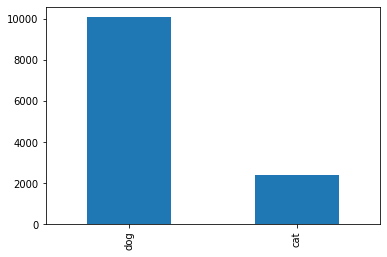

In [ ]:
test_df1['category'].value_counts().plot.bar()

Seeing Predicted reult with images

In [ ]:
sample_test = test_df1.head(18)
sample_test.head()

,Filenames,category
0,5360.jpg,cat
1,3937.jpg,dog
2,10438.jpg,dog
3,5067.jpg,dog
4,7013.jpg,cat


In [ ]:
for index,row in sample_test.iterrows():
  print(index,row['Filenames'],row['category'])

0 5360.jpg cat
1 3937.jpg dog
2 10438.jpg dog
3 5067.jpg dog
4 7013.jpg cat
5 10697.jpg dog
6 4768.jpg dog
7 7973.jpg dog
8 3190.jpg dog
9 6075.jpg dog
10 4814.jpg dog
11 7199.jpg dog
12 7811.jpg dog
13 1594.jpg dog
14 4862.jpg dog
15 6890.jpg cat
16 4968.jpg dog
17 493.jpg dog


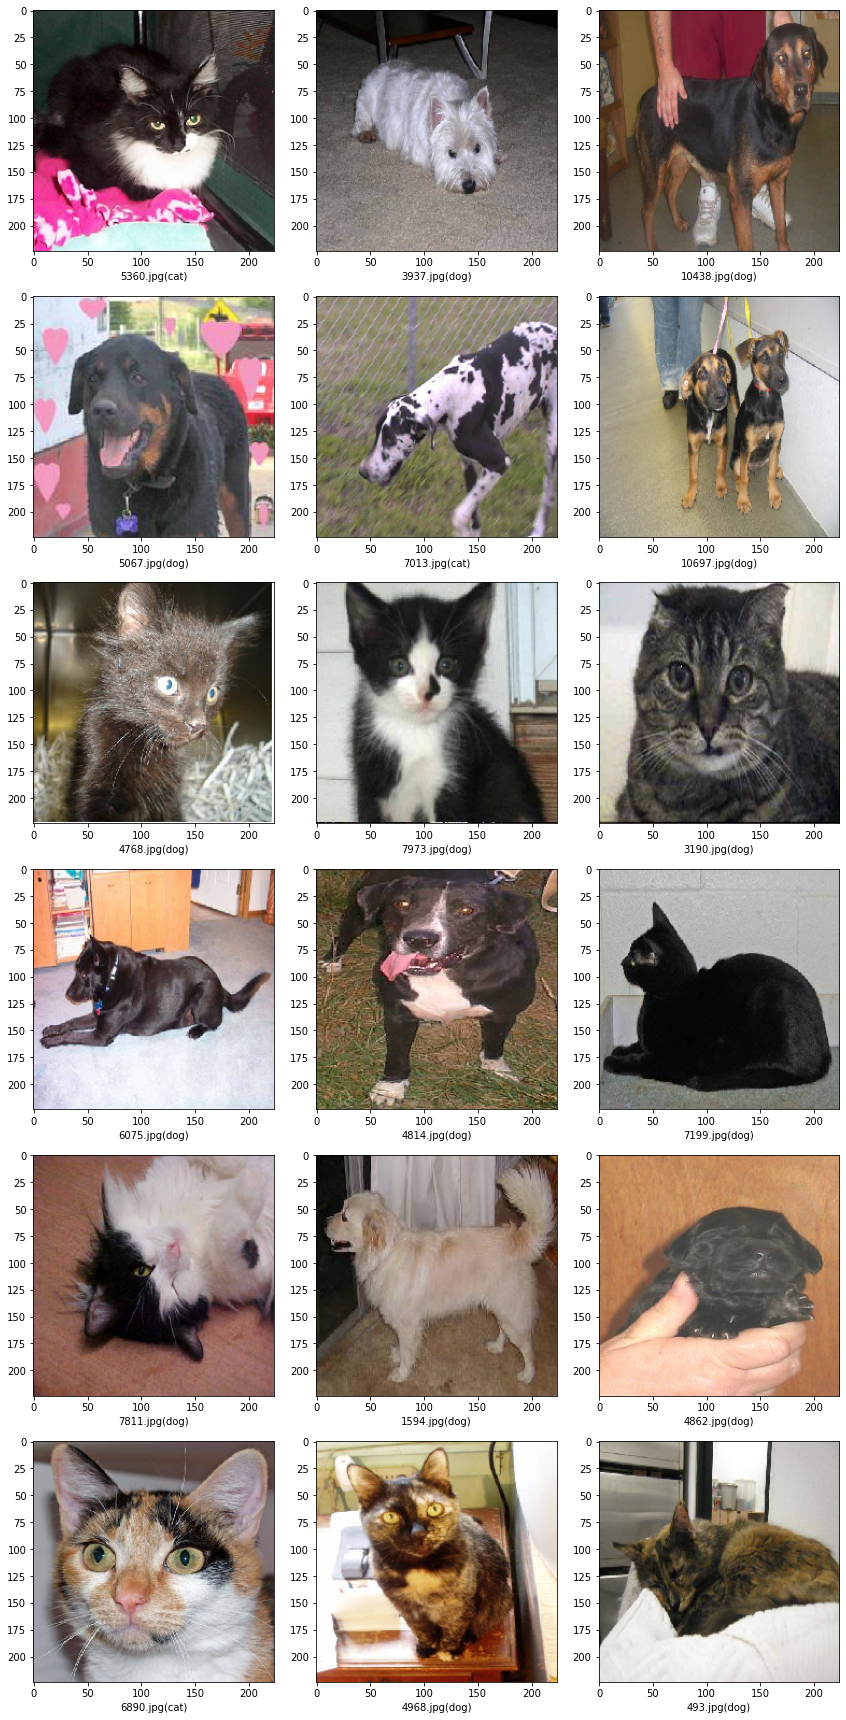

In [ ]:
#/content/test1/10.jpg
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['Filenames']
    category = row['category']
    img = load_img("/content/test1/"+filename, target_size=(224,224))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
#confusion matrix


In [ ]:
submission_df = test_df1.copy()
submission_df['id'] = submission_df['Filenames'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['Filenames', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)